# Alzheimer's Disease Detection using Handwriting Pattern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score ,recall_score, precision_score, f1_score 
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [2]:
data = pd.read_csv("D:\Coding Related\Programs in different languages\Alzheimer's Data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\netus\AppData\Local\Temp\ipykernel_28608\2188531289.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv("D:\Coding Related\Programs in different languages\Alzheimer's Data.csv")


In [3]:
data

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [5]:
print(data.shape)

print(data.isnull().sum())

(174, 452)
ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64


In [6]:
data.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [7]:
num_int = sum(data.dtypes == 'int64')
num_object = sum(data.dtypes == 'object')
num_float64 = sum(data.dtypes == 'float64')

print(f"Number of Columns that are  'int': {num_int}")
print(f"Number of Columns that are  'object': {num_object}")
print(f"Number of Columns that are  'float': {num_float64}")

Number of Columns that are  'int': 150
Number of Columns that are  'object': 2
Number of Columns that are  'float': 300


In [8]:
object_cols = data.select_dtypes(include='object').columns.tolist()
# print the column names
print(object_cols)

['ID', 'class']


In [9]:
data.drop('ID',axis = 1 , inplace = True)

In [10]:
data.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [11]:
# Function for checking the nan values
def check_nan_values(df):
    nan_cols = df.columns[df.isna().any()].tolist()
    return nan_cols

# Call the check_nan_values function to get the names of columns with NaN values
nan_cols = check_nan_values(data)

# Print the names of columns with NaN values
print(nan_cols)

[]


So the data does not have any blank values

# Applying PCA

In [12]:
# Ensure only numeric columns are used for variance calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculating variance and retaining only variables which capture 80% variance
variances = numeric_data.var()
threshold = 0.2
low_variance_features = variances[variances <= threshold].index
df_filtered = numeric_data.drop(columns=low_variance_features)
df_filtered.shape

(174, 333)

In [13]:
print(df_filtered.columns)

Index(['air_time1', 'gmrt_in_air1', 'gmrt_on_paper1', 'max_x_extension1',
       'max_y_extension1', 'mean_gmrt1', 'mean_speed_in_air1',
       'mean_speed_on_paper1', 'num_of_pendown1', 'paper_time1',
       ...
       'max_x_extension25', 'max_y_extension25', 'mean_gmrt25',
       'mean_speed_in_air25', 'mean_speed_on_paper25', 'num_of_pendown25',
       'paper_time25', 'pressure_mean25', 'pressure_var25', 'total_time25'],
      dtype='object', length=333)


In [14]:
# Separate features and target (if applicable)
df_filtered['class'] = data['class']
X = df_filtered.drop(['class'], axis=1)  
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_scaled = mmc.fit_transform(X)

In [15]:
# Perform PCA

pca = PCA(n_components=0.75)
principal_components = pca.fit_transform(X_scaled)
# Create a new DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_filtered['class'] = df_filtered['class'].replace({'H': 0, 'P': 1})
pc_df['class'] = df_filtered['class']

C:\Users\netus\AppData\Local\Temp\ipykernel_28608\933540317.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['class'] = df_filtered['class'].replace({'H': 0, 'P': 1})


In [16]:
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,class
0,-0.123579,0.332303,-0.351176,-0.483255,0.487280,0.090493,0.210477,-0.980939,-0.065533,-0.726104,...,-0.325673,-0.129855,-1.059084,-0.478149,0.576366,0.278678,-0.428096,-0.061827,0.561037,1
1,-2.762988,0.064246,-0.348668,0.108566,1.061183,0.683490,0.144358,-0.234737,0.099938,0.580639,...,-0.118717,-0.338424,-0.110994,-0.044564,0.107117,-0.157351,0.021695,-0.070222,0.218760,1
2,-0.355816,0.040217,-0.578641,-0.235944,-0.439980,-0.232421,0.657689,0.398746,0.269862,-0.047741,...,-0.069206,-0.054577,0.315979,0.189134,0.149984,0.054308,-0.054373,0.084165,0.105282,1
3,-1.414916,-0.313672,-0.155481,0.321802,0.262193,0.681193,0.369839,0.143979,-0.008916,0.280662,...,0.144484,0.083689,-0.017519,-0.548052,-0.112597,0.102900,0.079625,0.125467,0.138486,1
4,-0.805645,-0.282694,-1.104000,-0.253378,0.225806,0.184931,0.437349,-0.371561,0.258138,-0.044279,...,0.065664,0.263566,0.075960,0.064108,0.044913,-0.048296,0.221405,0.084472,-0.079017,1


In [17]:
pc_df.shape

(174, 38)

# Training the model

In [18]:
from sklearn.model_selection import train_test_split

x = pc_df.drop('class',axis = 1)
y = pc_df['class']
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.8,random_state = 42)

Handling Class Imbalance

In [19]:
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

Model Development & Deployment


In [20]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', max_depth=4,
    learning_rate=0.01, n_estimators=400, use_label_encoder=False, eval_metric='logloss'
)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)


xgb_model.fit(x_train_sm, y_train_sm)
rf_model.fit(x_train_sm, y_train_sm)
svm_model.fit(x_train_sm, y_train_sm)
lr_model.fit(x_train_sm, y_train_sm)

y_pred = xgb_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
svm_pred = svm_model.predict(x_test)
lr_pred = lr_model.predict(x_test)

y_proba = xgb_model.predict_proba(x_test)[:, 1]
rf_proba = rf_model.predict_proba(x_test)[:, 1]
svm_proba = svm_model.predict_proba(x_test)[:, 1]
lr_proba = lr_model.predict_proba(x_test)[:, 1]


# Calculating accuracy for each model
xgb_accuracy = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, rf_pred)
svm_acc = accuracy_score(y_test, svm_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")



C:\Users\netus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:20:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.9429
SVM Accuracy: 0.8857
Logistic Regression Accuracy: 0.8571
XGBoost Accuracy: 0.9714


# Model Evaluation

Random Forest

<Figure size 1000x500 with 0 Axes>

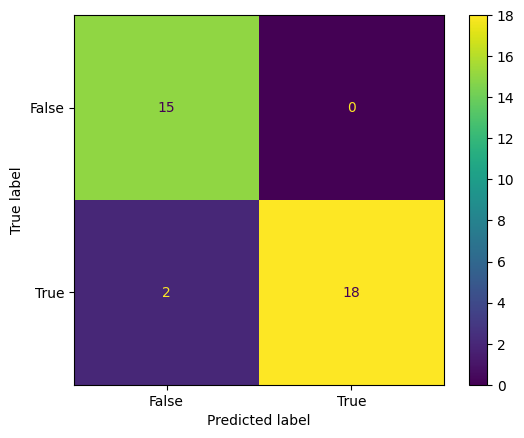

In [21]:
# Creating the confusion matrix 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y_test, rf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

# Calculating probabilities for the positive class
rf_proba = rf_model.predict_proba(x_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, rf_pred, target_names=["Healthy", "Patient"]))
print(f"Accuracy:  {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall:    {recall_score(y_test, rf_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, rf_proba):.4f}")

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.88      1.00      0.94        15
     Patient       1.00      0.90      0.95        20

    accuracy                           0.94        35
   macro avg       0.94      0.95      0.94        35
weighted avg       0.95      0.94      0.94        35

Accuracy:  0.9429
Precision: 1.0000
Recall:    0.9000
F1 Score:  0.9474
ROC-AUC:   0.9883


SVM

<Figure size 1000x500 with 0 Axes>

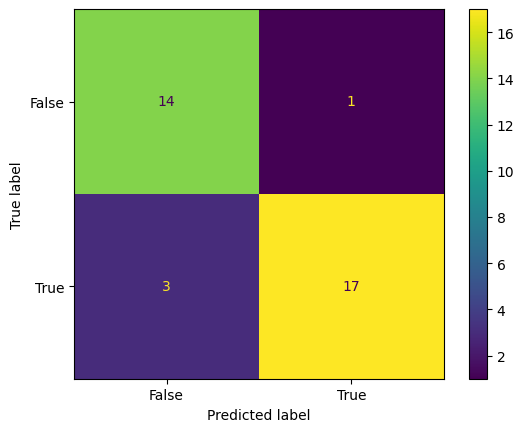

In [23]:
# Creating the confusion matrix 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y_test, svm_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

# Calculating probabilities for the positive class
svm_proba = svm_model.predict_proba(x_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, svm_pred, target_names=["Healthy", "Patient"]))
print(f"Accuracy:  {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall:    {recall_score(y_test, svm_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, svm_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, svm_proba):.4f}")

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.82      0.93      0.88        15
     Patient       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35

Accuracy:  0.8857
Precision: 0.9444
Recall:    0.8500
F1 Score:  0.8947
ROC-AUC:   0.9800


Logistic Regression

<Figure size 1000x500 with 0 Axes>

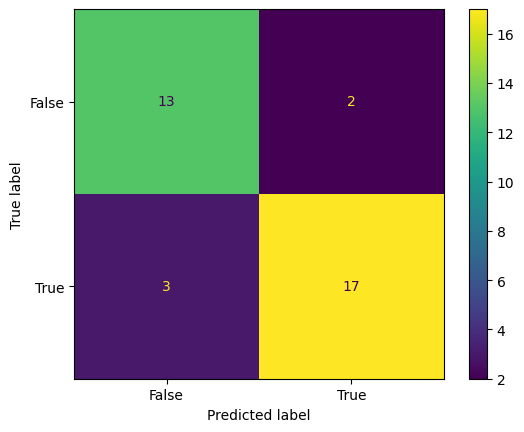

In [25]:
# Creating the confusion matrix 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y_test, lr_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()


In [26]:
from sklearn.metrics import classification_report, roc_auc_score

# Calculating probabilities for the positive class
lr_proba = lr_model.predict_proba(x_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, lr_pred, target_names=["Healthy", "Patient"]))
print(f"Accuracy:  {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall:    {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, lr_proba):.4f}")

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.81      0.87      0.84        15
     Patient       0.89      0.85      0.87        20

    accuracy                           0.86        35
   macro avg       0.85      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35

Accuracy:  0.8571
Precision: 0.8947
Recall:    0.8500
F1 Score:  0.8718
ROC-AUC:   0.9800


XGBoost

<Figure size 1000x500 with 0 Axes>

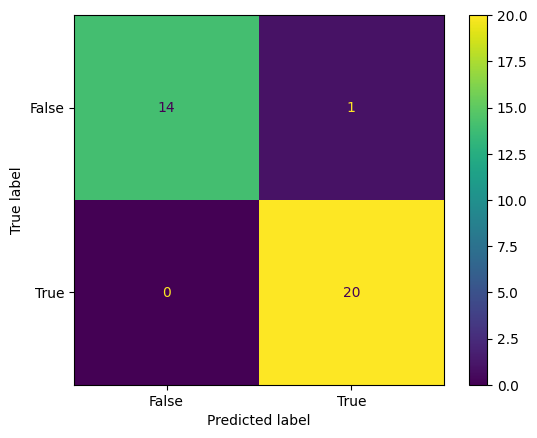

In [27]:
# Creating the confusion matrix 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()

In [28]:
# Checking the F1 score of the model
f1 = f1_score(y_test, y_pred)
print(f1)

0.975609756097561


In [29]:
from sklearn.metrics import classification_report, roc_auc_score

# Calculating probabilities for the positive class
y_proba = xgb_model.predict_proba(x_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Healthy", "Patient"]))
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_proba):.4f}")

Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      0.93      0.97        15
     Patient       0.95      1.00      0.98        20

    accuracy                           0.97        35
   macro avg       0.98      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35

Accuracy:  0.9714
Precision: 0.9524
Recall:    1.0000
F1 Score:  0.9756
ROC-AUC:   0.9967


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9714285714285714


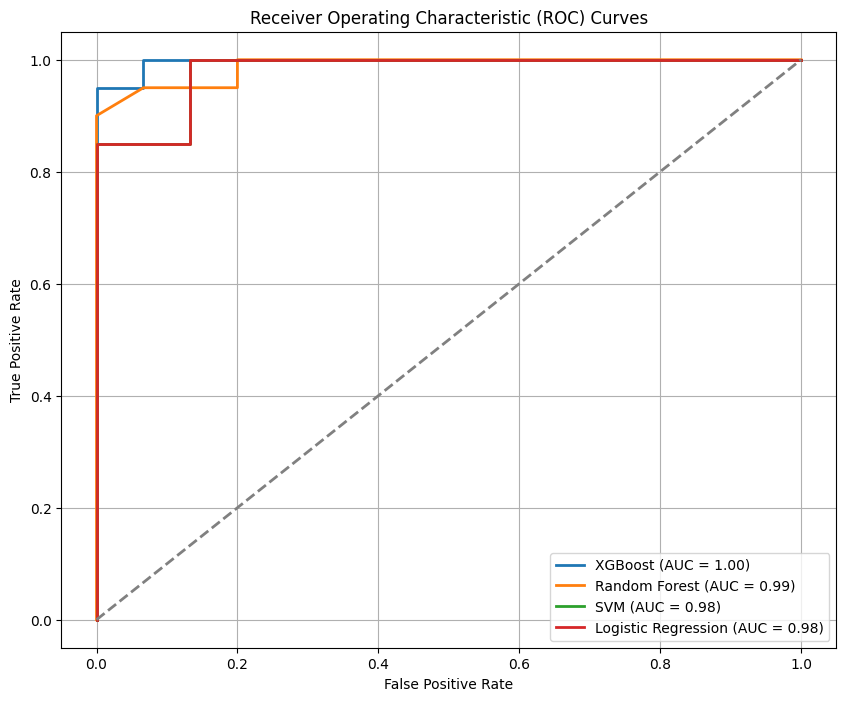

In [31]:
from sklearn.metrics import roc_curve, auc

# Defining a dictionary to store model predictions and probabilities
models = {
    "XGBoost": (y_pred, y_proba),
    "Random Forest": (rf_pred, rf_proba),
    "SVM": (svm_pred, svm_proba),
    "Logistic Regression": (lr_pred, lr_proba)
}

# Plotting ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, (pred, proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Adding labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()